In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housingprice', header = None) #read from dataset
data
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,64,2.3
1,74,2.6
2,86,3.9
3,117,3.8
4,166,3.9


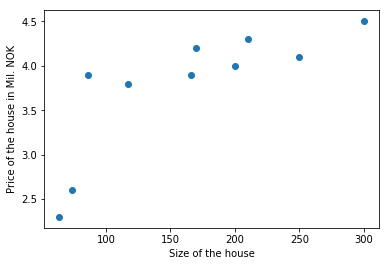

In [3]:
plt.scatter(X, y)
plt.xlabel('Size of the house')
plt.ylabel('Price of the house in Mil. NOK')
plt.show()

$J(\theta_1,\theta_2)=\frac{1}{2m}\sum_{i=1}^{m}{(h_{\theta}(x^{i})-y^i)}^2$

$h_{\theta}(x)=\theta_1 x + \theta_2$

Minimize $J(\theta_1,\theta_2)$

$\theta_2=0$

$h_{\theta}(x)=\theta_1 x$

Minimize $J(\theta_1,\theta_2)=\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i}-y^i)}^2$

In [4]:
def J(X, y, t):
    temp = t * X - y
    return np.sum(np.power(temp, 2)) / (2*m)

In [5]:
def cost(X,y,theta):
    l = []
    for i in theta:
        l.append(float(J(X,y,i)))
    return l

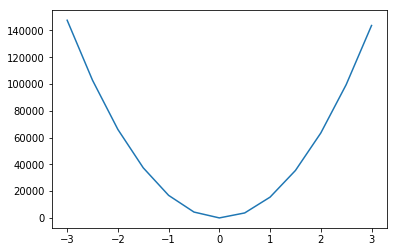

In [6]:
theta = np.arange(-3.0, 3.5, 0.5)
plt.plot(theta, cost(X,y,theta))
plt.show()

In [7]:
theta1 = np.arange(-20.0, 20.5, 0.5)
theta2 = np.arange(-20.0, 20.5, 0.5)
theta=[]
for t1 in theta1:
    for t2 in theta2:
        t = []
        t.append(float(t1))
        t.append(float(t2))
        theta.append(t)
theta

[[-20.0, -20.0],
 [-20.0, -19.5],
 [-20.0, -19.0],
 [-20.0, -18.5],
 [-20.0, -18.0],
 [-20.0, -17.5],
 [-20.0, -17.0],
 [-20.0, -16.5],
 [-20.0, -16.0],
 [-20.0, -15.5],
 [-20.0, -15.0],
 [-20.0, -14.5],
 [-20.0, -14.0],
 [-20.0, -13.5],
 [-20.0, -13.0],
 [-20.0, -12.5],
 [-20.0, -12.0],
 [-20.0, -11.5],
 [-20.0, -11.0],
 [-20.0, -10.5],
 [-20.0, -10.0],
 [-20.0, -9.5],
 [-20.0, -9.0],
 [-20.0, -8.5],
 [-20.0, -8.0],
 [-20.0, -7.5],
 [-20.0, -7.0],
 [-20.0, -6.5],
 [-20.0, -6.0],
 [-20.0, -5.5],
 [-20.0, -5.0],
 [-20.0, -4.5],
 [-20.0, -4.0],
 [-20.0, -3.5],
 [-20.0, -3.0],
 [-20.0, -2.5],
 [-20.0, -2.0],
 [-20.0, -1.5],
 [-20.0, -1.0],
 [-20.0, -0.5],
 [-20.0, 0.0],
 [-20.0, 0.5],
 [-20.0, 1.0],
 [-20.0, 1.5],
 [-20.0, 2.0],
 [-20.0, 2.5],
 [-20.0, 3.0],
 [-20.0, 3.5],
 [-20.0, 4.0],
 [-20.0, 4.5],
 [-20.0, 5.0],
 [-20.0, 5.5],
 [-20.0, 6.0],
 [-20.0, 6.5],
 [-20.0, 7.0],
 [-20.0, 7.5],
 [-20.0, 8.0],
 [-20.0, 8.5],
 [-20.0, 9.0],
 [-20.0, 9.5],
 [-20.0, 10.0],
 [-20.0, 10.5],
 [-20.0

In [8]:
def J(X, y, t):
    m=len(y)
    predictions=X.dot(t)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

Exception: Dot product shape mismatch, (10,) vs (2,)

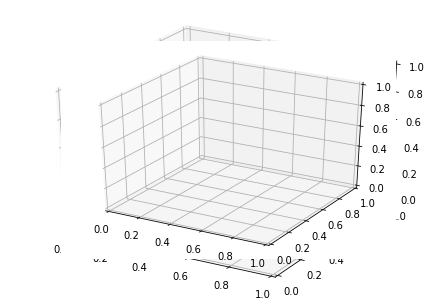

In [9]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
zaxis = cost(X,y,theta)
# ax.scatter(xaxis, yaxis, zaxis, zdir='z', c= 'red')
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
plt.show()

In [52]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [53]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
y=boston.target

In [54]:
X = df.values
X = (X - np.mean(X))/(np.max(X) - np.min(X))
y = (y - np.mean(y))/(np.max(y) - np.min(y))
X

array([[-0.09854803, -0.07324046, -0.09530797, ..., -0.07703793,
         0.45967093, -0.0915527 ],
       [-0.0985185 , -0.09855692, -0.08861317, ..., -0.07352175,
         0.45967093, -0.08570178],
       [-0.09851853, -0.09855692, -0.08861317, ..., -0.07352175,
         0.4539466 , -0.09288884],
       ...,
       [-0.09847146, -0.09855692, -0.08177773, ..., -0.06902105,
         0.45967093, -0.09062443],
       [-0.09840278, -0.09855692, -0.08177773, ..., -0.06902105,
         0.45481861, -0.08944299],
       [-0.09849023, -0.09855692, -0.08177773, ..., -0.06902105,
         0.45967093, -0.08747393]])

In [56]:
y

array([ 0.0326043 , -0.02072903,  0.27038208,  0.24149319,  0.30371542,
        0.13704875,  0.00815986,  0.10149319, -0.13406236, -0.08072903,
       -0.1673957 , -0.08072903, -0.01850681, -0.0473957 , -0.09628458,
       -0.05850681,  0.0126043 , -0.11184014, -0.05184014, -0.09628458,
       -0.19850681, -0.06517347, -0.16295125, -0.17850681, -0.15406236,
       -0.19184014, -0.13184014, -0.17184014, -0.09184014, -0.03406236,
       -0.21850681, -0.17850681, -0.2073957 , -0.20961792, -0.20072903,
       -0.08072903, -0.05628458, -0.03406236,  0.04815986,  0.18371542,
        0.27482653,  0.09038208,  0.06149319,  0.04815986, -0.02961792,
       -0.07184014, -0.05628458, -0.13184014, -0.18072903, -0.06961792,
       -0.06295125, -0.04517347,  0.05482653,  0.01927097, -0.08072903,
        0.28593764,  0.04815986,  0.20149319,  0.01704875, -0.06517347,
       -0.08517347, -0.14517347, -0.0073957 ,  0.05482653,  0.2326043 ,
        0.02149319, -0.06961792, -0.01184014, -0.11406236, -0.03

In [57]:

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X

array([[-0.16852158, -0.00782005],
       [-0.2375389 ,  0.01422814],
       [-0.2381318 ,  0.01980384],
       ...,
       [-0.19463736,  0.0013194 ],
       [-0.19339687,  0.00598006],
       [-0.19576699,  0.00141922]])

In [58]:
def J(X, y, t):
    temp = np.dot(X,t) - y
    return np.sum(np.power(temp, 2)) / (2*m)

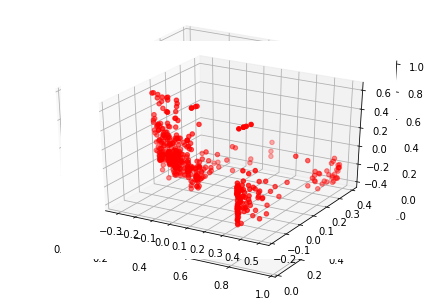

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in X]
yaxis = [row[1] for row in X]
ax.scatter(xaxis, yaxis, y, zdir='z', c= 'red')
plt.show()

IndexError: invalid index to scalar variable.

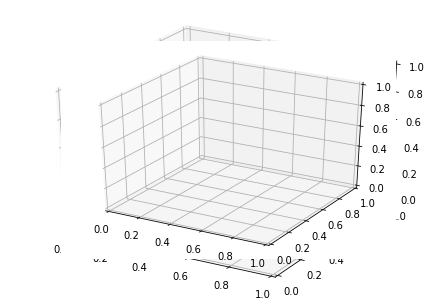

In [60]:
from mpl_toolkits.mplot3d import axes3d, Axes3D  
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
theta
zaxis = np.array(cost(X,y.tolist(),theta))
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
# ax.plot_surface(xaxis, yaxis, zaxis, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
plt.show()

$\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_1,\theta_2)$ for $(j=0 and j=1)$ 

In [61]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)
computeCost(X,y)

10.547233435807348

In [62]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(J(X,y,theta))
    
    return theta, J_history
theta,J_history = gradientDescent(X,y,[0,0],0.01,10)
print("h(x) ="+str(round(theta[0],2))+" + "+str(round(theta[1],2))+"x1")

h(x) =-0.0 + -0.0x1


In [63]:
data = pd.read_csv('CASP.csv') #read from dataset
data
X = data[['F8', 'F9']] # read first column
y = data['RMSD'] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [64]:
#Normalize X and y
X = (X - np.mean(X))/(np.max(X) - np.min(X))
y = (y - np.mean(y))/(np.max(y) - np.min(y))

In [65]:
X

(             F8        F9
 0      0.091500 -0.186996
 1     -0.088500  0.100395
 2     -0.117072  0.107011
 3      0.000071  0.113329
 4     -0.082786  0.134531
 5     -0.157072  0.167558
 6      0.000071  0.124092
 7      0.011500  0.072284
 8     -0.088500 -0.103114
 9     -0.125643  0.022218
 10     0.017214  0.087831
 11    -0.137072  0.067817
 12    -0.179929  0.174760
 13    -0.108500  0.063460
 14     0.148643 -0.192319
 15     0.268643 -0.101679
 16     0.268643 -0.024889
 17    -0.151357  0.026705
 18    -0.162786  0.249262
 19     0.088643 -0.212452
 20     0.408643 -0.267402
 21     0.120071 -0.201375
 22    -0.157072  0.046446
 23    -0.122786  0.066360
 24    -0.091357  0.054891
 25    -0.034214  0.025272
 26    -0.119929  0.002369
 27    -0.111357  0.107779
 28     0.028643  0.091991
 29    -0.008500 -0.196139
 ...         ...       ...
 45700  0.240071 -0.366511
 45701  0.414357 -0.222591
 45702 -0.048500 -0.159466
 45703 -0.094214  0.143380
 45704  0.000071  0.091794
 

In [66]:
y

0        0.454092
1       -0.082267
2        0.072693
3        0.385850
4        0.010166
5       -0.288039
6        0.074550
7       -0.274467
8       -0.277800
9       -0.297801
10       0.208080
11      -0.326898
12       0.007832
13       0.302608
14      -0.055599
15      -0.078029
16      -0.305230
17      -0.247370
18      -0.187796
19       0.518904
20       0.017404
21       0.507428
22       0.553858
23       0.469045
24       0.397803
25       0.341658
26      -0.290182
27      -0.172414
28      -0.298658
29      -0.265895
           ...   
45700   -0.322993
45701   -0.104887
45702   -0.198463
45703   -0.289896
45704    0.513047
45705    0.529857
45706    0.447710
45707    0.282369
45708   -0.142413
45709   -0.283848
45710   -0.201892
45711   -0.294134
45712    0.022500
45713    0.235034
45714    0.449139
45715   -0.322136
45716   -0.196654
45717    0.283274
45718    0.168316
45719   -0.152794
45720    0.468902
45721    0.255035
45722    0.461283
45723   -0.099839
45724    0

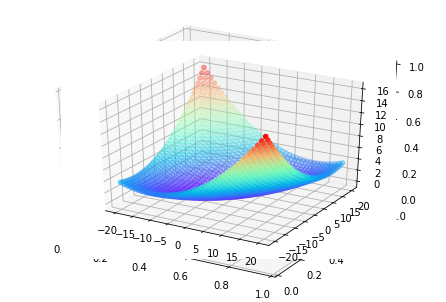

In [68]:
theta1 = np.arange(-20.0, 21, 1)
theta2 = np.arange(-20.0, 21, 1)
theta=[]
for t1 in theta1:
    for t2 in theta2:
        t = []
        t.append(float(t1))
        t.append(float(t2))
        theta.append(t)
theta
from mpl_toolkits.mplot3d import axes3d, Axes3D  
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
theta
zaxis = np.array(cost(X,y.tolist(),theta))
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
# ax.plot_surface(xaxis, yaxis, zaxis, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
plt.show()

$\frac{\partial}{\partial\theta_0}J(\theta_0,\theta_2) = \frac{\partial}{\partial\theta_0}\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i} + \theta_0 -y^i)}^2 = \frac{1}{m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}$

$\frac{\partial}{\partial\theta_1}J(\theta_0,\theta_1) = \frac{\partial}{\partial\theta_1}\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}^2 = \frac{1}{m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}x^i$

In [81]:
iterations = 1000
alpha = 0.01
print(iterations, alpha)
def gradientDescent(X, y, theta1, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta1) - y
        temp = np.dot(X.T, temp)
        theta1 = theta1 - (alpha/m) * temp
    return theta1
theta1 = gradientDescent(X, y, [2,5], alpha, iterations)

print(theta1)
print(J(X,y,theta1))

1000 0.01
[2.16686146 4.31512728]
0.15557098429270377
